# Review 

In [2]:
import sys
sys.path.append("..")

In [3]:
import dynamics
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [4]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

## Plotting vector fields

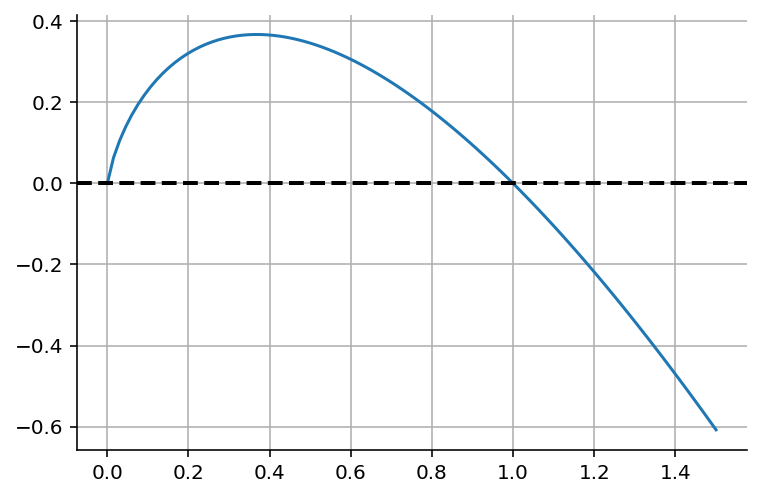

In [5]:
a, b = 1, 1
def f(N, t): return -a * N * np.log(b * N)

domain = np.linspace(1e-6, 1.5, 100)
plt.plot(domain, f(domain, 1))
plt.axhline(y=0,c="black", linestyle="--", linewidth=2)
plt.grid()

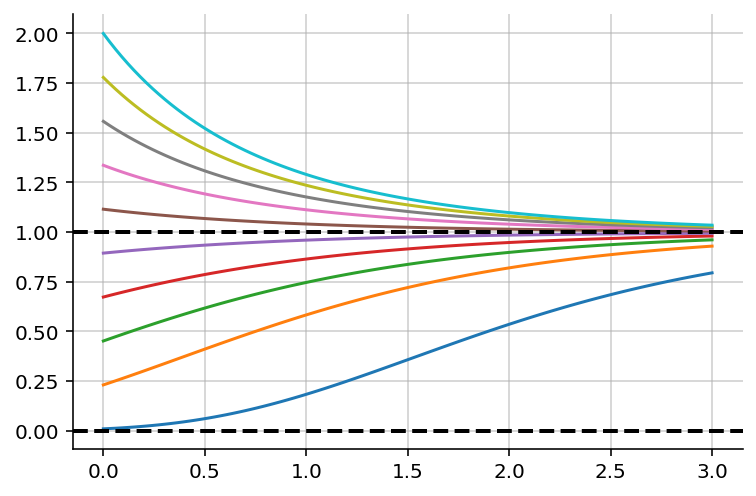

In [6]:
N0_vals = np.linspace(0.01, 2, 10)
t = np.linspace(0, 3, 100)
I = odeint(f, N0_vals, t)

plt.plot(t, I)
plt.axhline(y=0, c="black", linewidth=2, linestyle="--")
plt.axhline(y=1, c="black", linewidth=2, linestyle="--")
plt.grid(alpha=0.6)

## Chapter 4: Flows on the circle

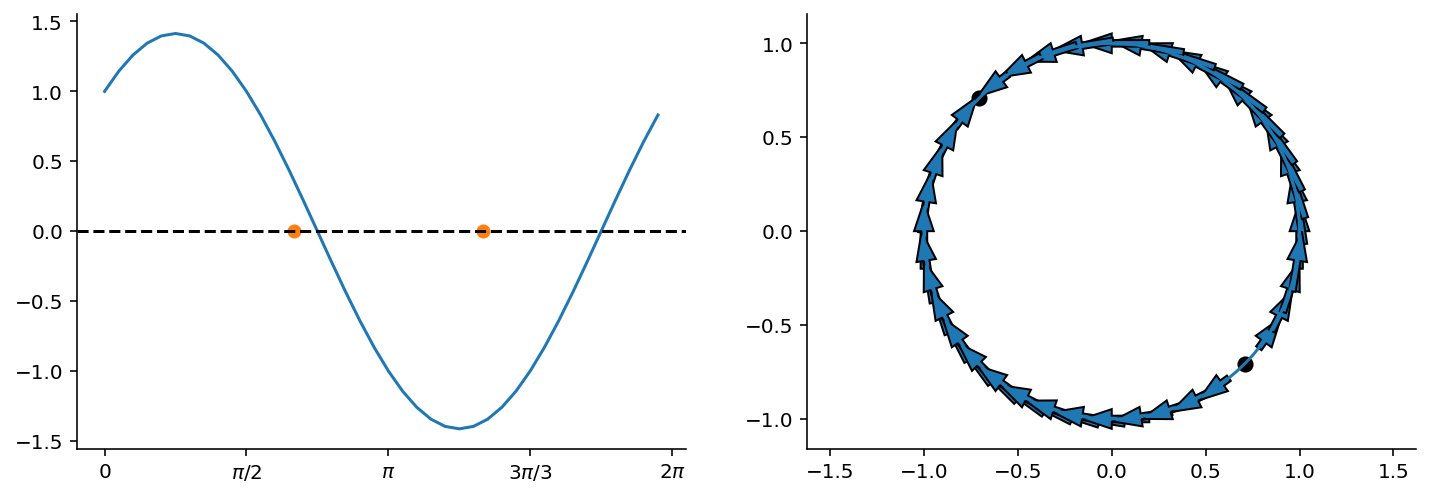

In [30]:
theta_init = np.arange(0, 2 * np.pi, np.pi / (4 * 5))

def f(θ):
    return np.sin(θ) + np.cos(θ)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

xticks = np.arange(0, 2 * np.pi + np.pi / 2, np.pi / 2)
xticks_labels = [r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi / 3$", r"$2\pi$"]
ax[0].plot(theta_init, f(theta_init))
ax[0].axhline(y=0, c="black", linestyle="--")
ax[0].scatter([2 * np.pi / 3, 4 * np.pi / 3], [0, 0], color="tab:orange")
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xticks_labels)

dynamics.plot_circular_dynamics(theta_init, f, ax=ax[1])